In [1]:
#pip install jupyter_contrib_nbextensions

In [2]:
#pip install shap

In [3]:
#jupyter contrib nbextension install

In [4]:
#data.to_pickle('QQQ.pkl')
import pandas as pd
#
eurusd = pd.read_pickle('EURUSD.pkl') #para recuperarlo un

In [5]:
data=eurusd

In [6]:
#quitamos los indices duplicados
data=data[~data.index.duplicated(keep='first')]

#quitamos retornos cero de horas sin trading
data['return']=data.close.pct_change()
data=data[data['return'] !=0]

data.tail(10)

,open,high,low,close,volume,spread,real_volume,return
time,,,,,,,,
2022-07-07 06:15:00+00:00,1.02057,1.02080,1.02043,1.02075,224,0,0,0.000176
2022-07-07 06:20:00+00:00,1.02074,1.02086,1.02054,1.02065,265,0,0,-0.000098
2022-07-07 06:25:00+00:00,1.02066,1.02074,1.02029,1.02038,312,0,0,-0.000265
2022-07-07 06:30:00+00:00,1.02037,1.02043,1.02002,1.02003,276,0,0,-0.000343
2022-07-07 06:35:00+00:00,1.02004,1.02045,1.02004,1.02037,230,0,0,0.000333
2022-07-07 06:40:00+00:00,1.02036,1.02073,1.02026,1.02070,320,0,0,0.000323
2022-07-07 06:45:00+00:00,1.02071,1.02076,1.02044,1.02046,240,0,0,-0.000235
2022-07-07 06:50:00+00:00,1.02047,1.02053,1.02028,1.02035,237,0,0,-0.000108
2022-07-07 06:55:00+00:00,1.02035,1.02040,1.02020,1.02040,188,0,0,0.000049


In [7]:
#pip install --upgrade ta

In [8]:
import ta
import numpy as np

In [9]:
#roc
data['roc'] = ta.momentum.ROCIndicator(close=data['close'], window=20,fillna=True).roc()
data['roc100'] = ta.momentum.ROCIndicator(close=data['close'], window=100).roc()
data['roc500'] = ta.momentum.ROCIndicator(close=data['close'], window=500).roc()
data['roc5000'] = ta.momentum.ROCIndicator(close=data['close'], window=5000).roc()
#average_true_range
data['atr']= ta.volatility.average_true_range(high=data['high'], low=data['low'], close=data['close'], window=100)
data['atr1k']= ta.volatility.average_true_range(high=data['high'], low=data['low'], close=data['close'], window=1000)
#kama
data['kama']= ta.momentum.kama(close=data['close'])
#obv
data['obv']= ta.volume.on_balance_volume(close=data['close'], volume=data['volume'])
#money flow index
data['mfi']=ta.volume.money_flow_index(high=data['high'], low=data['low'], close=data['close'], volume=data['volume'])
data['mfi100']=ta.volume.money_flow_index(high=data['high'], low=data['low'], close=data['close'], volume=data['volume'],window=100)
data['mfi1000']=ta.volume.money_flow_index(high=data['high'], low=data['low'], close=data['close'], volume=data['volume'],window=1000)
#ema
#ema10
data['ema10']= ta.trend.ema_indicator(close=data['close'], window=10)
data['sma14']= ta.trend.sma_indicator(close=data['close'], window=14)
#ema30
data['ema30']= ta.trend.ema_indicator(close=data['close'], window=30)
#ema20
data['ema20']= ta.trend.ema_indicator(close=data['close'], window=20)
#ema100
data['ema100']= ta.trend.ema_indicator(close=data['close'], window=100)
#emadiff
data['emadiff_30_10']=data['ema30']-data['ema10']
#ema500
data['ema500']= ta.trend.ema_indicator(close=data['close'], window=500)
data['ema5000']= ta.trend.ema_indicator(close=data['close'], window=5000)
data['ema5000_OBV']= ta.trend.ema_indicator(close=data['close'], window=5000)
#rsi
data['adx']= ta.trend.adx(high=data['high'], low=data['low'], close=data['close'], window=14)
data['adx100']= ta.trend.adx(high=data['high'], low=data['low'], close=data['close'], window=100)
data['adx1000']= ta.trend.adx(high=data['high'], low=data['low'], close=data['close'], window=1000)
#rsi
data['rsi']= ta.momentum.rsi(close=data['close'], window=14)
data['rsi50']= ta.momentum.rsi(close=data['close'], window=50)
data['rsi300']= ta.momentum.rsi(close=data['close'], window=300)
data['rsi5000']= ta.momentum.rsi(close=data['close'], window=5000)
data['macd']= ta.trend.macd(close=data['close'])
data['macd_signal']= ta.trend.macd_signal(close=data['close'])

C:\Users\ax29423\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\ax29423\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
C:\Users\ax29423\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\ax29423\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:774: RuntimeWarning: invalid value encountered in double_scalars
  din[idx] = 100 * (self._din[idx] / value)
C:\Users\ax29423\AppData\Local\Programs\Python\Python39\lib\site-packages\ta\trend.py:769: RuntimeWarning: invalid value encountered in double_scalars
  dip[idx] = 100 * (self._dip[idx] / value)
C:\Users\ax29423\AppData\

In [10]:
data.head()

,open,high,low,close,volume,spread,real_volume,return,roc,roc100,...,ema5000_OBV,adx,adx100,adx1000,rsi,rsi50,rsi300,rsi5000,macd,macd_signal
time,,,,,,,,,,,,,,,,,,,,,
2020-10-05 07:00:00+00:00,1.17279,1.17288,1.17264,1.17285,230,2,0,NaN,0.0,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05 07:05:00+00:00,1.17285,1.17293,1.17281,1.17281,149,2,0,-0.000034,0.0,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05 07:10:00+00:00,1.17281,1.17287,1.17272,1.17286,199,2,0,0.000043,0.0,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05 07:15:00+00:00,1.17285,1.17292,1.17274,1.17290,215,2,0,0.000034,0.0,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-05 07:20:00+00:00,1.17290,1.17298,1.17286,1.17289,211,2,0,-0.000009,0.0,NaN,...,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
data['roc12'] = ta.momentum.ROCIndicator(close=data['close'], window=12,fillna=True).roc()

In [12]:
#pip install matplotlib

In [13]:
#metemos la hora para luego considerar el cambio de horas
data['hora']=data.index.hour

In [14]:
data.hora.tail()

time
2022-07-07 06:40:00+00:00    6
2022-07-07 06:45:00+00:00    6
2022-07-07 06:50:00+00:00    6
2022-07-07 06:55:00+00:00    6
2022-07-07 07:00:00+00:00    7
Name: hora, dtype: int64

In [15]:
#calculamos cuando cambia la hora
data['chghora']=data['hora']-data['hora'].shift(1)

In [16]:

data['chghora'].tail()

time
2022-07-07 06:40:00+00:00    0.0
2022-07-07 06:45:00+00:00    0.0
2022-07-07 06:50:00+00:00    0.0
2022-07-07 06:55:00+00:00    0.0
2022-07-07 07:00:00+00:00    1.0
Name: chghora, dtype: float64

In [17]:
import matplotlib

In [18]:
#hacemos resample de horas
data_h=data.close.resample("1h").ohlc(_method='ohlc')

In [19]:
data_h['change1']=data_h.close.pct_change()

In [20]:
#quitamos ceros
datah=data_h[data_h['change1'] !=0].copy()


In [21]:
#desviacion de precio
datah['devp']=(datah.close-datah.close.rolling(20).mean())/(datah.close.rolling(20).std())
datah['devp200']=(datah.close-datah.close.rolling(200).mean())/(datah.close.rolling(200).std())

In [22]:
datah['devp']=datah['devp'].shift(1)

<AxesSubplot:xlabel='time'>

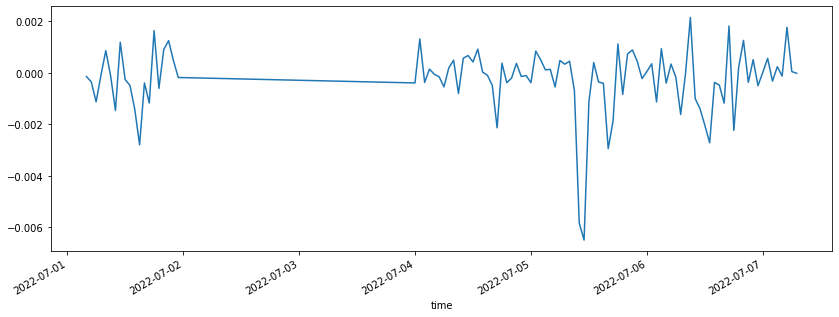

In [23]:
datah.tail(100).change1.plot(figsize=(14,5))

In [24]:
datah['dev']=abs((abs(datah.change1)-abs(datah.change1).rolling(12*5).mean()))/abs(datah.change1).rolling(12*5).std()

In [25]:
datah.tail(50)

,open,high,low,close,change1,devp,devp200,dev
time,,,,,,,,
2022-07-05 06:00:00+00:00,1.04283,1.04360,1.04283,1.04344,0.000479,-0.300182,-1.134461,0.185394
2022-07-05 07:00:00+00:00,1.04322,1.04379,1.04322,1.04379,0.000335,0.149925,-1.064032,0.425471
2022-07-05 08:00:00+00:00,1.04418,1.04472,1.04418,1.04426,0.000450,0.475582,-0.973874,0.219816
2022-07-05 09:00:00+00:00,1.04372,1.04372,1.04309,1.04354,-0.000689,0.909553,-1.086260,0.208461
2022-07-05 10:00:00+00:00,1.04332,1.04332,1.03723,1.03745,-0.005836,0.341636,-2.095765,6.009260
2022-07-05 11:00:00+00:00,1.03673,1.03673,1.03071,1.03071,-0.006497,-3.507887,-3.149512,5.016275
2022-07-05 12:00:00+00:00,1.03123,1.03170,1.02805,1.02954,-0.001135,-3.745783,-3.241404,0.304319
2022-07-05 13:00:00+00:00,1.02969,1.03056,1.02942,1.02995,0.000398,-2.895369,-3.087721,0.344324
2022-07-05 14:00:00+00:00,1.02970,1.03020,1.02895,1.02958,-0.000359,-2.246800,-3.060985,0.382128


<AxesSubplot:xlabel='time'>

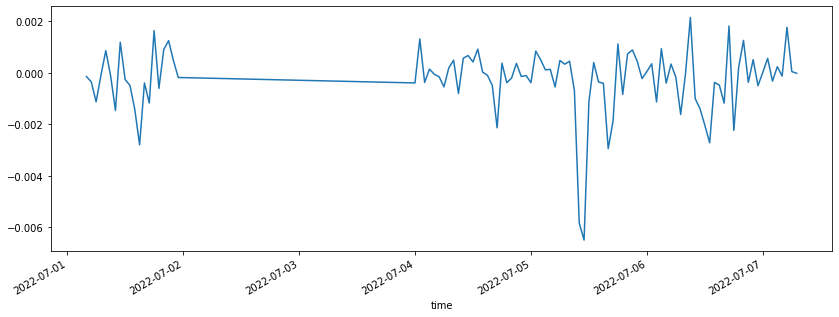

In [26]:
datah.tail(100).change1.plot(figsize=(14,5))

<AxesSubplot:xlabel='time'>

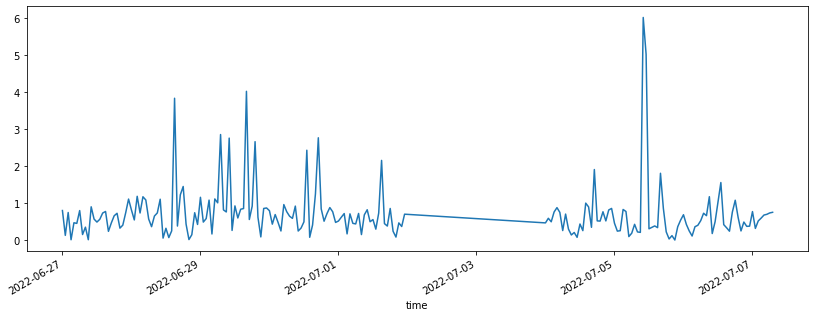

In [27]:
datah.tail(200).dev.plot(figsize=(14,5))

In [28]:
datah['ret1']=datah.close.pct_change()


In [107]:
datah.close.pct_change(20).describe()

count    10658.000000
mean        -0.000252
std          0.003853
min         -0.017544
25%         -0.002381
50%         -0.000174
75%          0.002105
max          0.017867
Name: close, dtype: float64

In [29]:
datah['shiftr']=datah['ret1'].shift(-1)

In [30]:
datah.tail()

,open,high,low,close,change1,devp,devp200,dev,ret1,shiftr
time,,,,,,,,,,
2022-07-07 03:00:00+00:00,1.01808,1.01871,1.01769,1.01868,0.000236,-0.591666,-2.114431,0.592737,0.000236,-0.000128
2022-07-07 04:00:00+00:00,1.01848,1.01867,1.01829,1.01855,-0.000128,-0.443049,-2.090976,0.675992,-0.000128,0.001767
2022-07-07 05:00:00+00:00,1.01895,1.02035,1.01872,1.02035,0.001767,-0.410879,-1.912245,0.695628,0.001767,0.000049
2022-07-07 06:00:00+00:00,1.02014,1.02075,1.02003,1.02040,0.000049,0.422837,-1.881510,0.732955,0.000049,-0.000020
2022-07-07 07:00:00+00:00,1.02038,1.02038,1.02038,1.02038,-0.000020,0.745590,-1.857132,0.750070,-0.000020,NaN


In [31]:
import numpy as np

In [32]:
datah['target']=np.sign(datah.shiftr)

In [33]:
datah.tail()

,open,high,low,close,change1,devp,devp200,dev,ret1,shiftr,target
time,,,,,,,,,,,
2022-07-07 03:00:00+00:00,1.01808,1.01871,1.01769,1.01868,0.000236,-0.591666,-2.114431,0.592737,0.000236,-0.000128,-1.0
2022-07-07 04:00:00+00:00,1.01848,1.01867,1.01829,1.01855,-0.000128,-0.443049,-2.090976,0.675992,-0.000128,0.001767,1.0
2022-07-07 05:00:00+00:00,1.01895,1.02035,1.01872,1.02035,0.001767,-0.410879,-1.912245,0.695628,0.001767,0.000049,1.0
2022-07-07 06:00:00+00:00,1.02014,1.02075,1.02003,1.02040,0.000049,0.422837,-1.881510,0.732955,0.000049,-0.000020,-1.0
2022-07-07 07:00:00+00:00,1.02038,1.02038,1.02038,1.02038,-0.000020,0.745590,-1.857132,0.750070,-0.000020,NaN,NaN


In [34]:
datah['dev_ant']=datah['dev'].shift(1)

In [35]:
datah.tail()

,open,high,low,close,change1,devp,devp200,dev,ret1,shiftr,target,dev_ant
time,,,,,,,,,,,,
2022-07-07 03:00:00+00:00,1.01808,1.01871,1.01769,1.01868,0.000236,-0.591666,-2.114431,0.592737,0.000236,-0.000128,-1.0,0.516529
2022-07-07 04:00:00+00:00,1.01848,1.01867,1.01829,1.01855,-0.000128,-0.443049,-2.090976,0.675992,-0.000128,0.001767,1.0,0.592737
2022-07-07 05:00:00+00:00,1.01895,1.02035,1.01872,1.02035,0.001767,-0.410879,-1.912245,0.695628,0.001767,0.000049,1.0,0.675992
2022-07-07 06:00:00+00:00,1.02014,1.02075,1.02003,1.02040,0.000049,0.422837,-1.881510,0.732955,0.000049,-0.000020,-1.0,0.695628
2022-07-07 07:00:00+00:00,1.02038,1.02038,1.02038,1.02038,-0.000020,0.745590,-1.857132,0.750070,-0.000020,NaN,NaN,0.732955


In [36]:
datah['signo_dev_ant']=np.sign(datah.ret1.shift(1))


In [37]:
datah['devant-dev']=(datah.dev_ant-datah.dev)*datah.signo_dev_ant

In [38]:
datah.tail(50)

,open,high,low,close,change1,devp,devp200,dev,ret1,shiftr,target,dev_ant,signo_dev_ant,devant-dev
time,,,,,,,,,,,,,,
2022-07-05 06:00:00+00:00,1.04283,1.04360,1.04283,1.04344,0.000479,-0.300182,-1.134461,0.185394,0.000479,0.000335,1.0,0.094822,-1.0,0.090571
2022-07-05 07:00:00+00:00,1.04322,1.04379,1.04322,1.04379,0.000335,0.149925,-1.064032,0.425471,0.000335,0.000450,1.0,0.185394,1.0,-0.240077
2022-07-05 08:00:00+00:00,1.04418,1.04472,1.04418,1.04426,0.000450,0.475582,-0.973874,0.219816,0.000450,-0.000689,-1.0,0.425471,1.0,0.205655
2022-07-05 09:00:00+00:00,1.04372,1.04372,1.04309,1.04354,-0.000689,0.909553,-1.086260,0.208461,-0.000689,-0.005836,-1.0,0.219816,1.0,0.011356
2022-07-05 10:00:00+00:00,1.04332,1.04332,1.03723,1.03745,-0.005836,0.341636,-2.095765,6.009260,-0.005836,-0.006497,-1.0,0.208461,-1.0,5.800799
2022-07-05 11:00:00+00:00,1.03673,1.03673,1.03071,1.03071,-0.006497,-3.507887,-3.149512,5.016275,-0.006497,-0.001135,-1.0,6.009260,-1.0,-0.992984
2022-07-05 12:00:00+00:00,1.03123,1.03170,1.02805,1.02954,-0.001135,-3.745783,-3.241404,0.304319,-0.001135,0.000398,1.0,5.016275,-1.0,-4.711956
2022-07-05 13:00:00+00:00,1.02969,1.03056,1.02942,1.02995,0.000398,-2.895369,-3.087721,0.344324,0.000398,-0.000359,-1.0,0.304319,-1.0,0.040005
2022-07-05 14:00:00+00:00,1.02970,1.03020,1.02895,1.02958,-0.000359,-2.246800,-3.060985,0.382128,-0.000359,-0.000408,-1.0,0.344324,1.0,-0.037804


In [39]:
datah=datah.dropna()

In [40]:
xa=datah[datah.dev_ant>datah.dev]['devant-dev']
ya=datah[datah.dev_ant>datah.dev].target

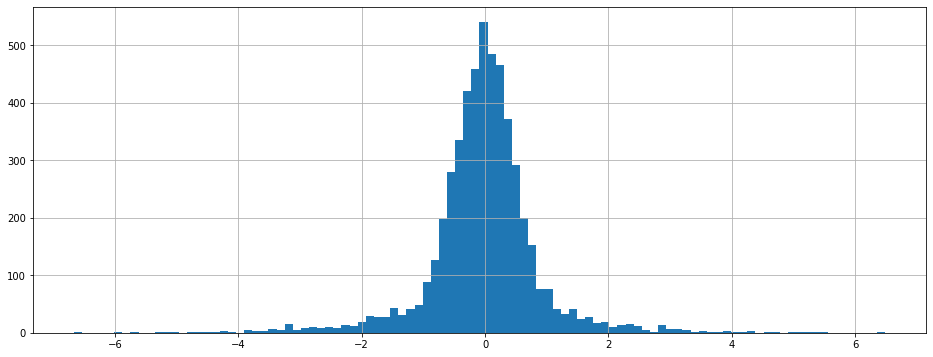

In [41]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))
plt.hist(xa, bins = 100)
plt.grid(True)
plt.show()

<AxesSubplot:xlabel='time'>

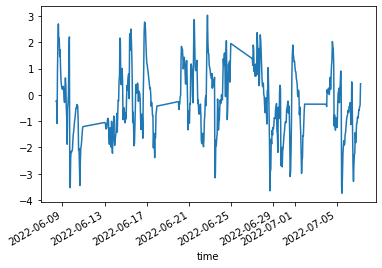

In [42]:
datah.devp.tail(500).plot()

In [43]:
#probabilidad de que baje en la siguiente hora cuando ha habido una subida fuerte
#con el patron fuerte movimento primero y depues poco
thres=2
fil1=(datah['devant-dev']>=thres)
fil2=(datah.target==-1)
fil3=(datah.dev_ant>datah.dev)
#devp hacemos shift1 para no hacer fwd looking
fil4=(datah.devp>2)
(datah[fil1 & fil2 & fil3 & fil4].target.count())/(datah[fil1 & fil3].target.count())

0.2711864406779661

In [44]:
dfilt=datah[fil1 & fil3 ]

In [45]:
132/(122+132)

0.5196850393700787

In [46]:
xa.describe()

count    5279.000000
mean       -0.025613
std         0.915764
min        -6.666242
25%        -0.396039
50%        -0.007897
75%         0.359214
max         6.485216
Name: devant-dev, dtype: float64

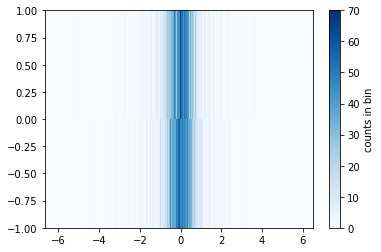

In [47]:
import matplotlib.pyplot as plt
plt.hist2d(xa, ya, bins=(500,2), cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [48]:
datah['class_pred'] = pd.cut(xa, bins=4)

In [49]:
datah['Labeup_ok'] = np.where(datah.target==1 , 1, 0)

In [50]:
ya=datah[datah.dev_ant>datah.dev]['Labeup_ok']

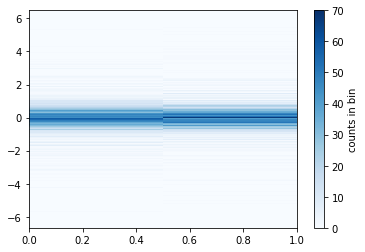

In [51]:
import matplotlib.pyplot as plt
plt.hist2d(ya,xa,bins=(2,500), cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

In [52]:
#definimos una función de probabilidad
def Proba (serie):
    probabil=np.sum(serie)/len(serie)
    return probabil

In [53]:
ya.value_counts()

0    2647
1    2632
Name: Labeup_ok, dtype: int64

In [54]:
Proba(datah.Labeup_ok)

0.49803333957669976

In [55]:
#mostramos por clase
pivot_predict=pd.pivot_table(datah,index=["class_pred"],values=["Labeup_ok"],aggfunc=[Proba])

<AxesSubplot:xlabel='class_pred'>

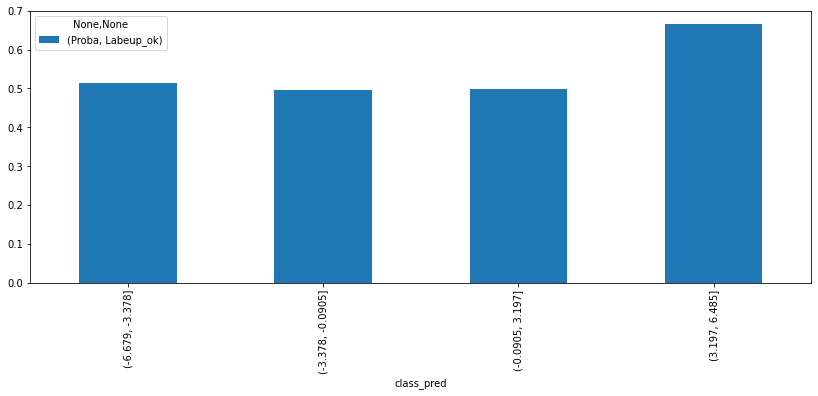

In [56]:
pivot_predict.plot(figsize=(14, 5),kind='bar')

In [57]:
pivot_predict_cuenta=pd.pivot_table(datah,index=["class_pred"],values=["Labeup_ok"],aggfunc=[np.count_nonzero])

<AxesSubplot:xlabel='class_pred'>

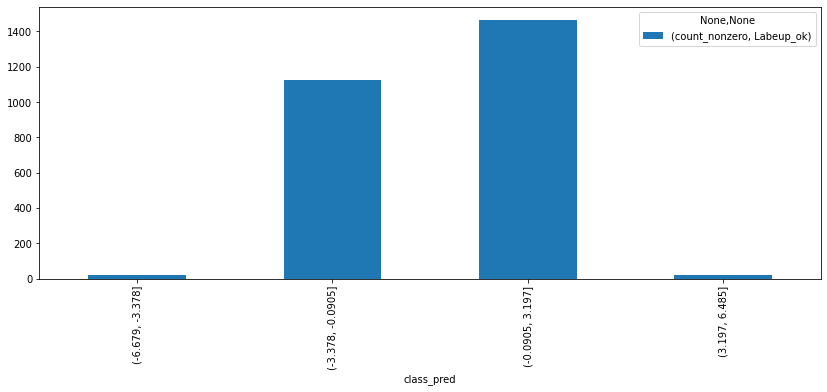

In [58]:
pivot_predict_cuenta.plot(figsize=(14, 5),kind='bar')

In [59]:
datah.target.value_counts()

-1.0    5360
 1.0    5318
Name: target, dtype: int64

In [60]:
#X=datah[['dev','dev_ant','ret1']]
X=dfilt[['devp','devp200']]

In [61]:
len(X)

118

In [62]:
X.head()

,devp,devp200
time,,
2020-10-20 13:00:00+00:00,3.155610,1.431853
2020-10-23 11:00:00+00:00,1.314550,1.215362
2020-10-30 16:00:00+00:00,2.566275,-1.874900
2020-11-03 18:00:00+00:00,1.986795,-0.338008
2020-11-17 11:00:00+00:00,1.800707,1.209881


In [63]:
#y=datah.target
y=dfilt.target

In [64]:
y.head()

time
2020-10-20 13:00:00+00:00   -1.0
2020-10-23 11:00:00+00:00    1.0
2020-10-30 16:00:00+00:00   -1.0
2020-11-03 18:00:00+00:00   -1.0
2020-11-17 11:00:00+00:00    1.0
Name: target, dtype: float64

In [65]:
len(y)

118

# train test split

In [66]:
# Total dataset length
dataset_length = X.shape[0]

# Training dataset length
split = int(dataset_length * 0.70)
split

82

In [67]:
# Splitiing the X and y into train and test datasets
X_cls_train, X_cls_test = X[:split], X[split:]
y_cls_train, y_cls_test = y[:split], y[split:]

In [68]:
#definimos parametros de ML

#por si acaso algun predictor tiene pocos datos ponemos=1
#min_samp_leaf=2
max_feat=X_cls_train.shape[1]
#max_feat=1
max_depth=4
min_samp_leaf=int(len(X_cls_train)*0.05/max_depth)
#para rf
min_impurity_decrease=0.0
#numero de arboles en rf
n_arboles=100

In [69]:
len(X_cls_train)

82

In [70]:
len(y_cls_train)

82

In [71]:
min_samp_leaf=int(len(X_cls_train)*0.05/max_depth)

In [72]:
min_samp_leaf

1

In [73]:
len(X_cls_train)/12

6.833333333333333

In [74]:
#min_samp_leaf=1

In [75]:
#pip install -U scikit-learn

In [76]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier

clf = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=min_samp_leaf,max_features=max_feat,
                             random_state=42,min_impurity_decrease=0.0,class_weight='balanced')
clf_no_bal = DecisionTreeClassifier(criterion='gini', max_depth=max_depth, min_samples_leaf=min_samp_leaf,max_features=max_feat,
                             random_state=42,min_impurity_decrease=0.0)
#contemplar el analisis class_weight='balanced')
rf = RandomForestClassifier(n_estimators=n_arboles,bootstrap=True,max_depth=max_depth, min_samples_leaf=min_samp_leaf,
                            max_features='sqrt', min_impurity_decrease=min_impurity_decrease,
                            random_state=42,class_weight='balanced_subsample')

In [77]:
#fit de tree
clf = clf.fit(X_cls_train, y_cls_train)
clf_no_bal= clf_no_bal.fit(X_cls_train, y_cls_train)
rf = rf.fit(X_cls_train, y_cls_train)

In [78]:
#make forcast
y_cls_pred = clf.predict(X_cls_test)
y_cls_pred_no_bal = clf_no_bal.predict(X_cls_test)
y_rf_pred = rf.predict(X_cls_test)

In [79]:
from sklearn.metrics import classification_report, accuracy_score, recall_score

In [80]:
report = classification_report(y_cls_test, y_cls_pred)
print(report)

              precision    recall  f1-score   support

        -1.0       0.58      0.58      0.58        19
         1.0       0.53      0.53      0.53        17

    accuracy                           0.56        36
   macro avg       0.55      0.55      0.55        36
weighted avg       0.56      0.56      0.56        36



In [81]:
#clf no balanceado
report = classification_report(y_cls_test, y_cls_pred_no_bal)
print(report)

              precision    recall  f1-score   support

        -1.0       0.60      0.63      0.62        19
         1.0       0.56      0.53      0.55        17

    accuracy                           0.58        36
   macro avg       0.58      0.58      0.58        36
weighted avg       0.58      0.58      0.58        36



In [82]:
report = classification_report(y_cls_test, y_rf_pred)
print(report)

              precision    recall  f1-score   support

        -1.0       0.64      0.74      0.68        19
         1.0       0.64      0.53      0.58        17

    accuracy                           0.64        36
   macro avg       0.64      0.63      0.63        36
weighted avg       0.64      0.64      0.63        36



Pintamos el arbol

In [83]:
predictors_list=X.columns.to_list()
predictors_list

['devp', 'devp200']

In [84]:
import matplotlib.pyplot as plt

In [85]:
#show the tree
from sklearn import tree

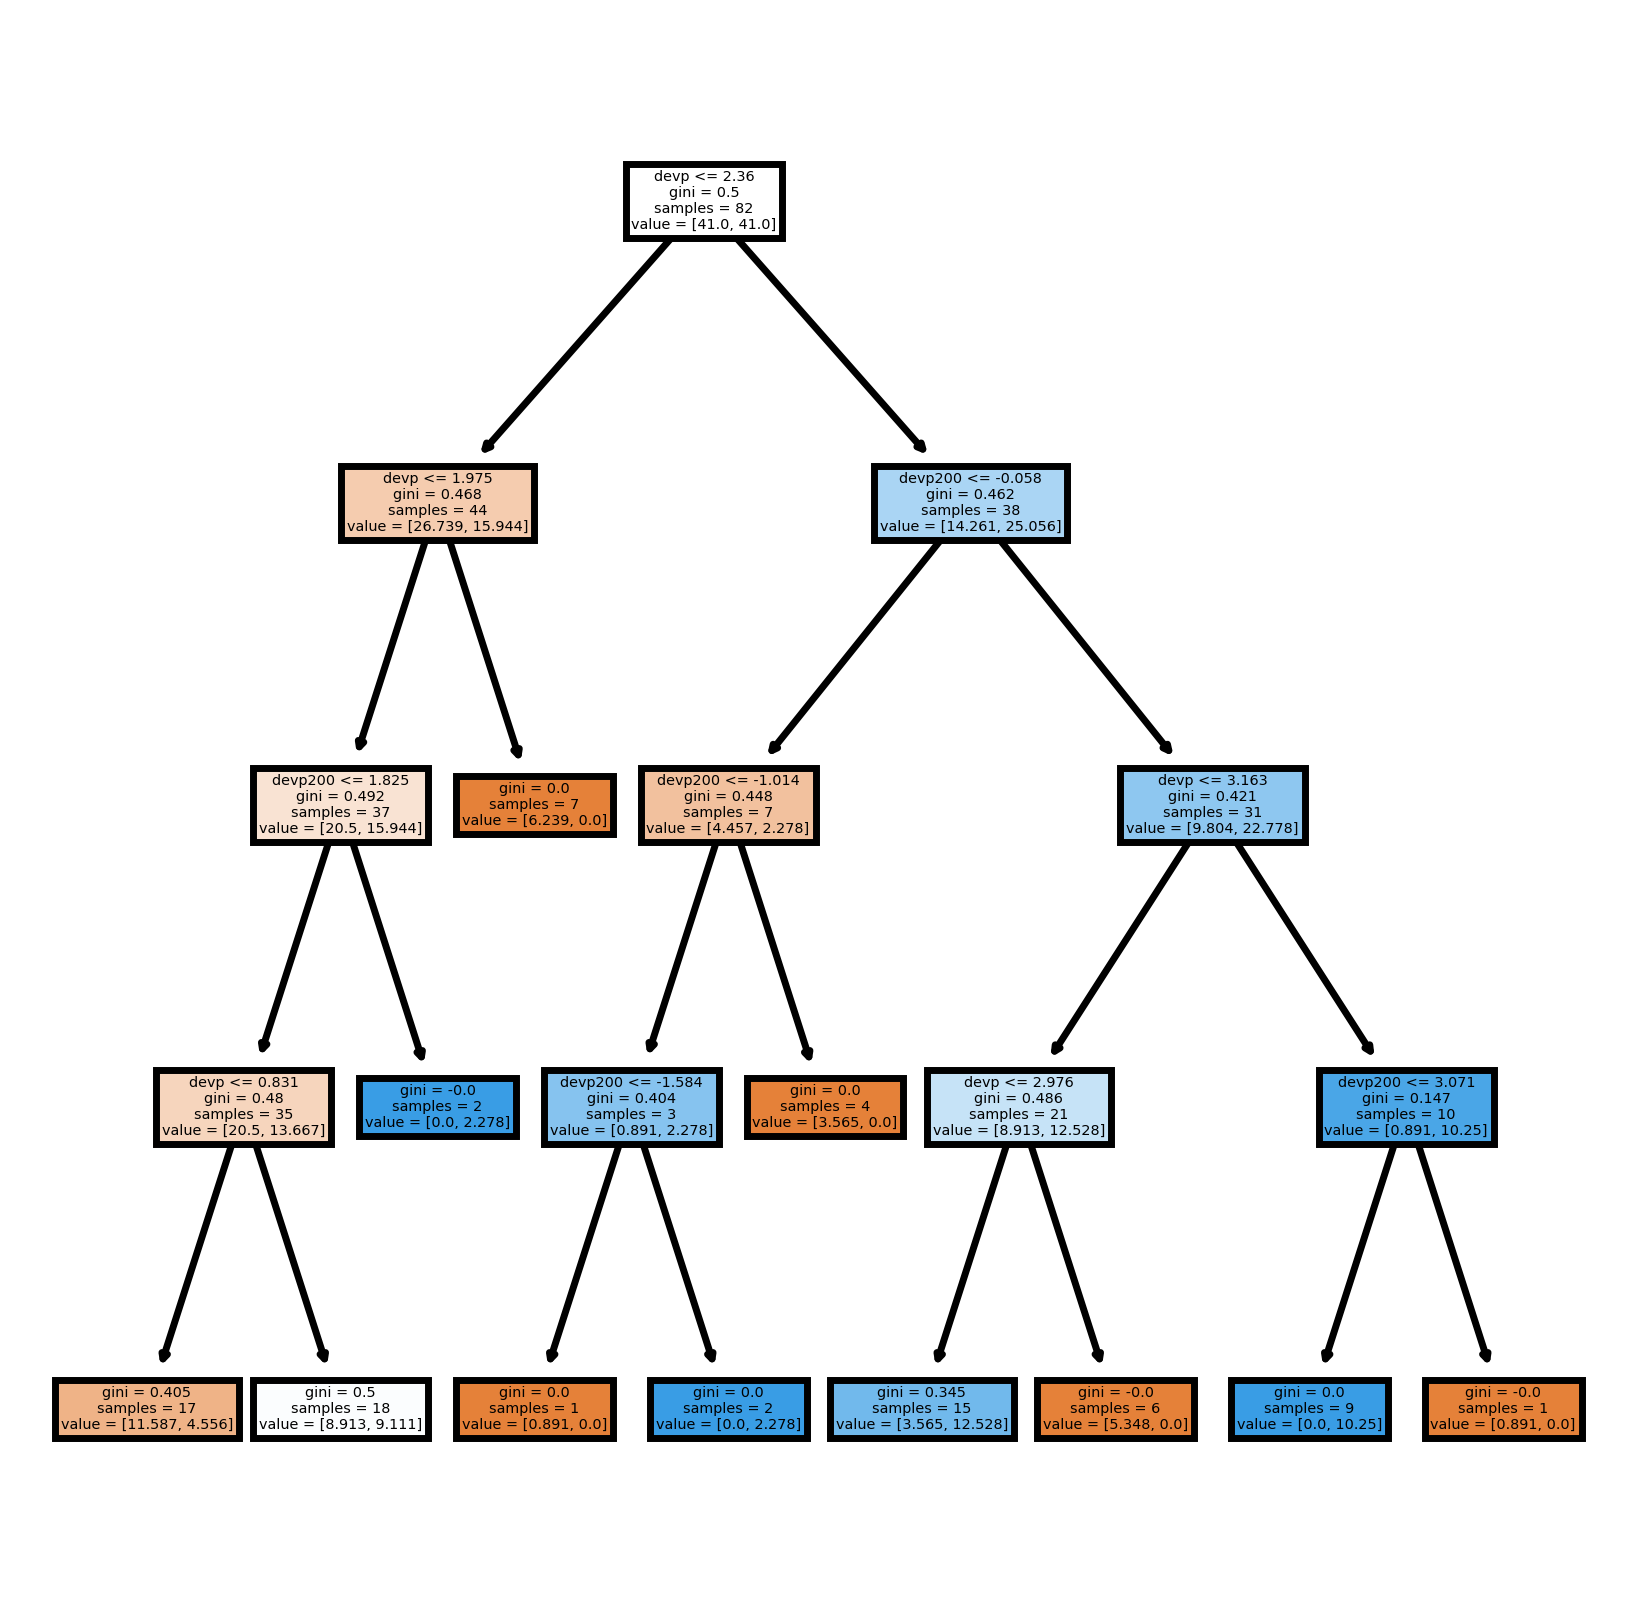

In [86]:
fn=predictors_list
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=500)
tree.plot_tree(clf,
               feature_names = fn,
               filled = True);
fig.savefig('clf.png')

In [87]:
from sklearn.inspection import PartialDependenceDisplay

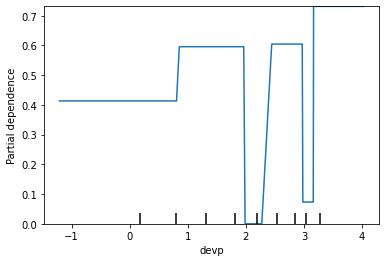

In [88]:
var = 'devp'
PartialDependenceDisplay.from_estimator(clf, X_cls_train, [var]);

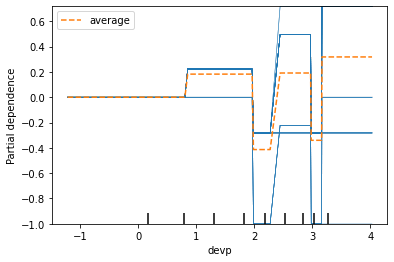

In [89]:
var = 'devp'
PartialDependenceDisplay.from_estimator(clf, X_cls_train, [var],
                                       kind='both',
                                       centered=True);

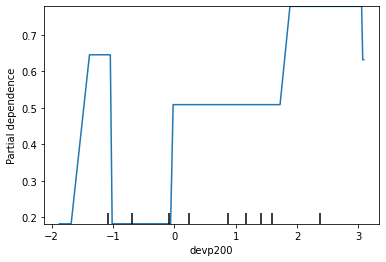

In [90]:
var = 'devp200'
PartialDependenceDisplay.from_estimator(clf, X_cls_train, [var]);

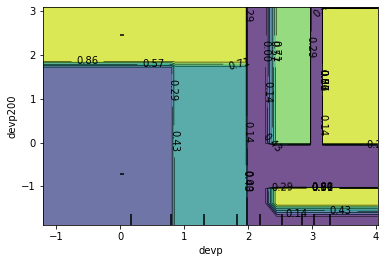

In [91]:
var = ('devp','devp200')
PartialDependenceDisplay.from_estimator(clf, X_cls_train, [var]);

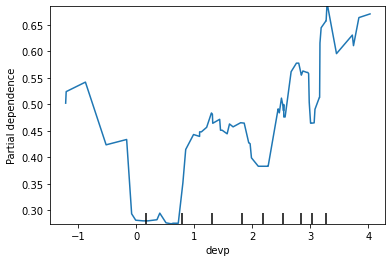

In [92]:
var = 'devp'
PartialDependenceDisplay.from_estimator(rf, X_cls_train, [var]);

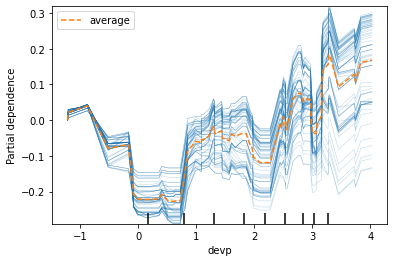

In [93]:
var = 'devp'
PartialDependenceDisplay.from_estimator(rf, X_cls_train, [var],
                                       kind='both',
                                       centered=True);

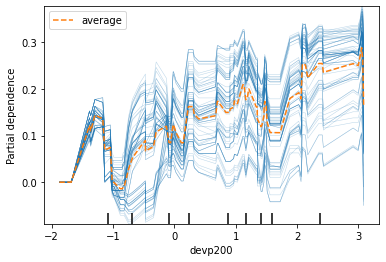

In [94]:
var = 'devp200'
PartialDependenceDisplay.from_estimator(rf, X_cls_train, [var],
                                       kind='both',
                                       centered=True);

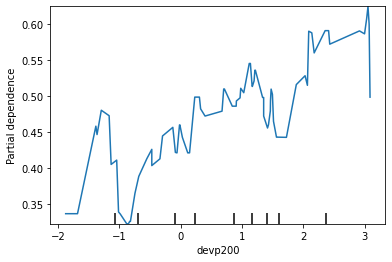

In [95]:
var = 'devp200'
PartialDependenceDisplay.from_estimator(rf, X_cls_train, [var])

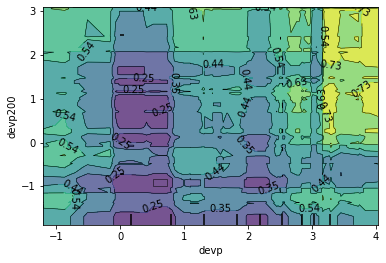

In [96]:
var = ('devp','devp200')
PartialDependenceDisplay.from_estimator(rf, X_cls_train, [var]);

In [97]:
dfilt.tail()

,open,high,low,close,change1,devp,devp200,dev,ret1,shiftr,target,dev_ant,signo_dev_ant,devant-dev
time,,,,,,,,,,,,,,
2022-06-07 17:00:00+00:00,1.06879,1.07095,1.06792,1.07047,0.001553,0.546924,-0.475543,1.336469,0.001553,-0.000747,-1.0,3.720780,1.0,2.384311
2022-06-15 09:00:00+00:00,1.04644,1.04917,1.04546,1.04734,0.001004,2.205069,-1.174446,0.079466,0.001004,-0.000707,-1.0,3.041363,1.0,2.961898
2022-06-22 18:00:00+00:00,1.05909,1.05964,1.05799,1.05799,-0.001604,3.033013,1.745210,1.056270,-0.001604,-0.000501,-1.0,3.590813,1.0,2.534543
2022-06-23 17:00:00+00:00,1.05467,1.05467,1.05138,1.05285,-0.001423,-0.156161,0.698864,0.386648,-0.001423,-0.002526,-1.0,2.452329,1.0,2.065681
2022-06-29 11:00:00+00:00,1.05146,1.05157,1.05066,1.05105,-0.000552,-0.469327,-0.870364,0.260816,-0.000552,-0.000124,-1.0,2.752711,1.0,2.491896


In [98]:
#acertamos si el target es -1 ya que ya esta filtrada para detectar bajadas
dfilt['result']=np.where(dfilt.target>0, -1, 1)

C:\Users\ax29423\AppData\Local\Temp/ipykernel_29980/4056135279.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfilt['result']=np.where(dfilt.target>0, -1, 1)


<AxesSubplot:xlabel='time'>

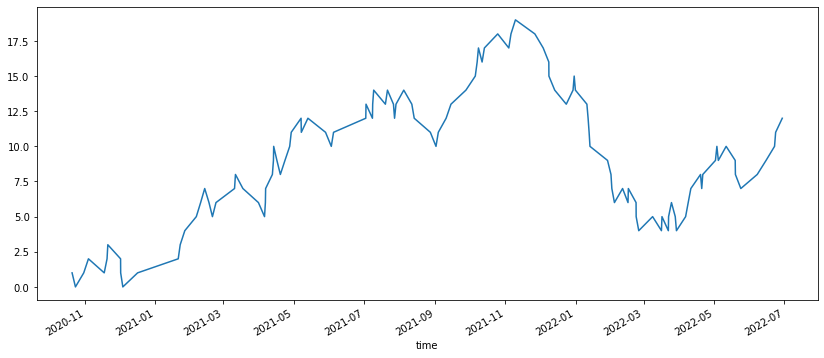

In [99]:
dfilt.result.cumsum().plot(figsize=(14,6))

In [100]:
fil_best1=(dfilt.devp<1)
fil_best2=(dfilt.devp>0)

<AxesSubplot:xlabel='time'>

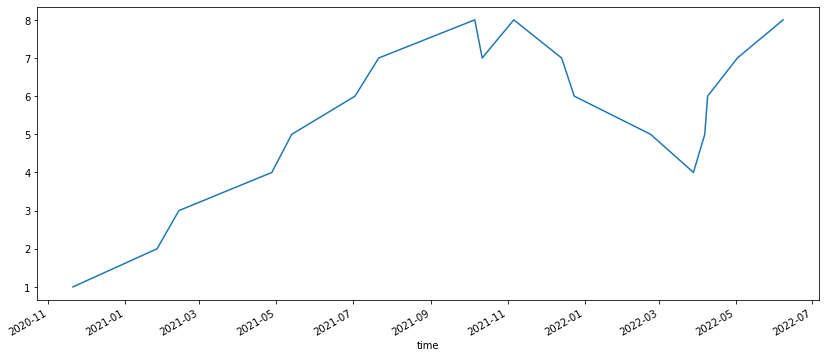

In [101]:
dfilt[fil_best1 & fil_best2].result.cumsum().plot(figsize=(14,6))

In [102]:
import shap
model=rf
explainer = shap.Explainer(model.predict,X_cls_train)
shap_values = explainer(X_cls_train)

Exact explainer: 83it [00:12,  3.40it/s]                                                                               


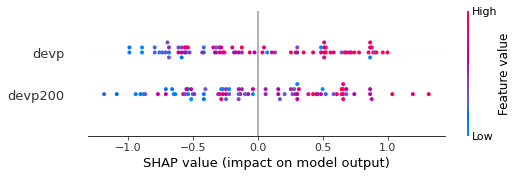

In [103]:
# summarize the effects of all the features
shap.plots.beeswarm(shap_values)

In [104]:
X_cls_train


,devp,devp200
time,,
2020-10-20 13:00:00+00:00,3.155610,1.431853
2020-10-23 11:00:00+00:00,1.314550,1.215362
2020-10-30 16:00:00+00:00,2.566275,-1.874900
2020-11-03 18:00:00+00:00,1.986795,-0.338008
2020-11-17 11:00:00+00:00,1.800707,1.209881
...,...,...
2021-12-31 18:00:00+00:00,3.186401,3.054384
2022-01-10 18:00:00+00:00,-0.870978,0.305718
2022-01-11 19:00:00+00:00,2.872262,1.353138


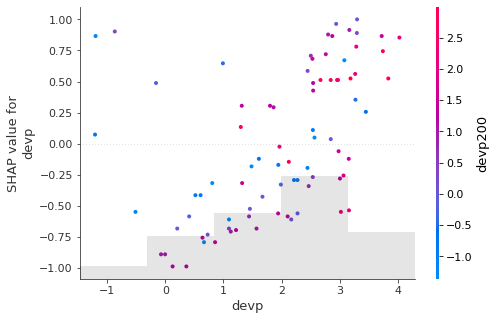

In [105]:
# create a dependence scatter plot to show the effect of a single feature across the whole dataset
shap.plots.scatter(shap_values[:,"devp"], color=shap_values)

In [106]:
stop

NameError: name 'stop' is not defined

# 

# Bactesting. py

In [ ]:
#pip install backtesting

In [ ]:
from backtesting import Backtest, Strategy
from backtesting.lib import crossover

from backtesting.test import SMA, GOOG


class SmaCross(Strategy):
    def init(self):
        price = self.data.Close
        self.ma1 = self.I(SMA, price, 10)
        self.ma2 = self.I(SMA, price, 20)

    def next(self):
        if crossover(self.ma1, self.ma2):
            self.buy()
        elif crossover(self.ma2, self.ma1):
            self.sell()


bt = Backtest(GOOG, SmaCross, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

In [ ]:
import ta

In [ ]:
type(GOOG)

In [ ]:
lower_band = ta.volatility.bollinger_hband(GOOG.Close, window=20, window_dev=2, fillna=True)

In [ ]:
lower_band.to_numpy().T

In [ ]:
def indicator(data):
    lower_band = ta.volatility.bollinger_lband(data.Close.s, window=20, window_dev=2, fillna=True)
    upper_band = ta.volatility.bollinger_hband(data.Close.s, window=20, window_dev=2, fillna=True)
    lower_band=lower_band.to_numpy().T
    upper_band=upper_band.to_numpy().T
    return lower_band,upper_band

I'm defining a function here called indicator, that takes in data, runs that through ta.bbands, converts the resulting DataFrame to a numpy array, transposes it and returns only the first 4 row

https://greyhoundanalytics.com/blog/custom-indicators-in-backtestingpy/

In [ ]:
class DFStrategy(Strategy):
    def init(self):
        
        [self.lower_band,self.higher_band] = self.I(indicator, self.data)

    def next(self):

        lower_band = self.lower_band
        upper_band = self.higher_band
        
        if self.position:
            if self.data.Close[-1] > upper_band[-1]:
                self.position.close()
        else:
            print(self.data.Close[-1], lower_band[-1])
            if self.data.Close[-1] < lower_band[-1]:
                self.buy()




In [ ]:
bt = Backtest(GOOG, DFStrategy, commission=.002,
              exclusive_orders=True)
stats = bt.run()
bt.plot()

ahora definimos otra de bollinge mas refinada

In [ ]:
class DFStrategy(Strategy):
    
    def init(self):
        
        [self.lower_band,self.higher_band] = self.I(indicator, self.data)

    def next(self):

        lower_band = self.lower_band
        upper_band = self.higher_band
        
        if self.position:
            if self.data.Close[-1] < lower_band[-1]:
                self.position.close()

        else:
            if (self.data.Close[-1] < upper_band[-1]) and (self.data.Close[-2] > upper_band[-2]):
                #self.position.close()
                self.sell()
      


In [ ]:
bt = Backtest(GOOG, DFStrategy, commission=.002,
              exclusive_orders=True)
stats = bt.run()

In [ ]:
bt.plot()